In [2]:
import pandas as pd
df=pd.DataFrame()

In [4]:
df=pd.read_csv('ashish nagar.csv', index_col='date',parse_dates=True)


<ipython-input-4-f3fa01d1e62e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv('ashish nagar.csv', index_col='date',parse_dates=True)


<Axes: xlabel='date'>

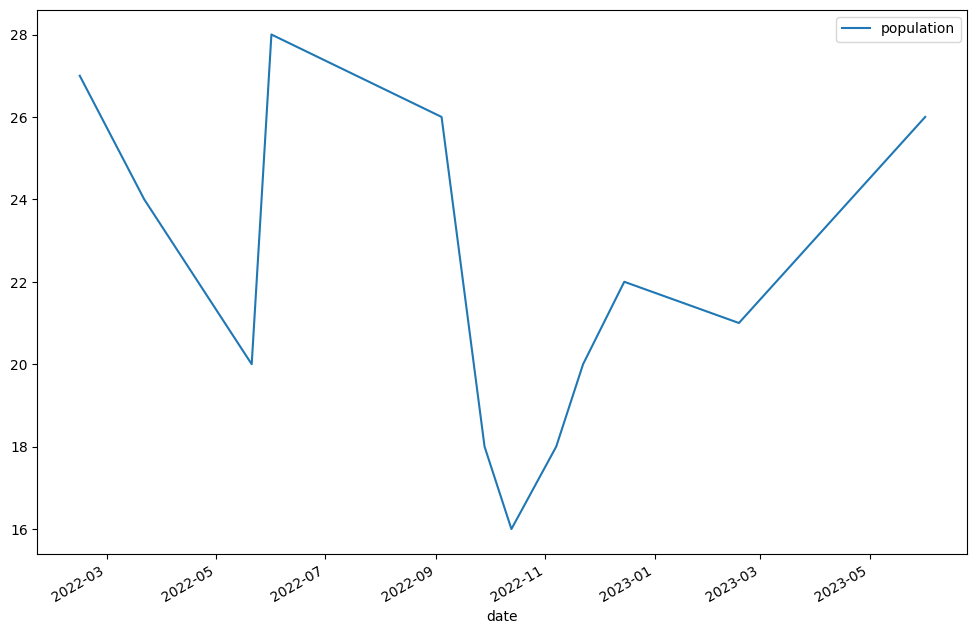

In [5]:
df.columns = ['population']
df.plot(figsize=(12,8))


In [6]:
df['population_LastMonth']=df['population'].shift(+1)
df['population_2Monthsback']=df['population'].shift(+2)
df['population_3Monthsback']=df['population'].shift(+3)
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-06-01,28,NaN,NaN,NaN
2022-02-14,27,28.0,NaN,NaN
2022-03-22,24,27.0,28.0,NaN
2022-09-04,26,24.0,27.0,28.0
2022-05-21,20,26.0,24.0,27.0
2022-11-07,18,20.0,26.0,24.0
2022-09-28,18,18.0,20.0,26.0
2022-10-13,16,18.0,18.0,20.0
2022-11-22,20,16.0,18.0,18.0


In [7]:
df=df.dropna()
df

,population,population_LastMonth,population_2Monthsback,population_3Monthsback
date,,,,
2022-09-04,26,24.0,27.0,28.0
2022-05-21,20,26.0,24.0,27.0
2022-11-07,18,20.0,26.0,24.0
2022-09-28,18,18.0,20.0,26.0
2022-10-13,16,18.0,18.0,20.0
2022-11-22,20,16.0,18.0,18.0
2022-12-15,22,20.0,16.0,18.0
2023-06-01,26,22.0,20.0,16.0
2023-02-17,21,26.0,22.0,20.0


In [8]:
from sklearn.linear_model import LinearRegression
lin_model=LinearRegression()

In [9]:
import numpy as np
x1,x2,x3,y=df['population_LastMonth'],df['population_2Monthsback'],df['population_3Monthsback'],df['population']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x3.reshape(-1,1),y.reshape(-1,1)
final_x=np.concatenate((x1,x2,x3),axis=1)
print(final_x)

[[24. 27. 28.]
 [26. 24. 27.]
 [20. 26. 24.]
 [18. 20. 26.]
 [18. 18. 20.]
 [16. 18. 18.]
 [20. 16. 18.]
 [22. 20. 16.]
 [26. 22. 20.]]


In [10]:
X_train,X_test,y_train,y_test=final_x[1:14],final_x[1:14],y[1:16],y[1:16]
print(X_train.shape)
print(y_train.shape)

(8, 3)
(8, 1)


In [11]:
lin_model.fit(X_train,y_train)

LinearRegression()

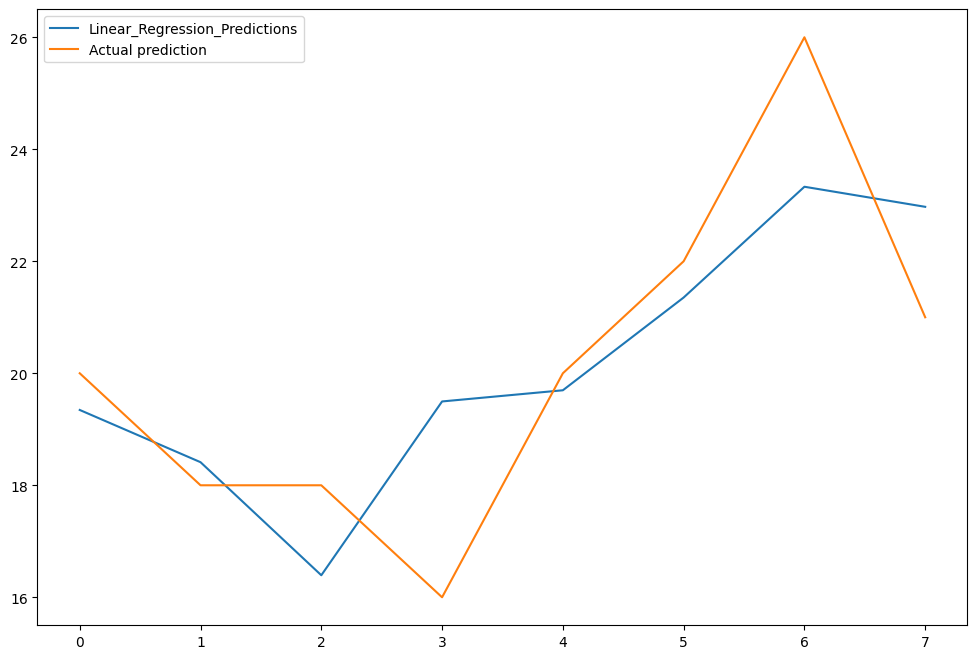

In [12]:
lin_pred=lin_model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(lin_pred,label='Linear_Regression_Predictions')
plt.plot(y_test,label='Actual prediction')
plt.legend(loc="upper left")
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_lr=sqrt(mean_squared_error(lin_pred,y_test))

In [14]:
print('Mean Squared Error for Linear Regression Model is:',rmse_lr)

Mean Squared Error for Linear Regression Model is: 1.8348909355018523
